### Student Name: Christian Clarke

In [14]:
#import the required modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn  import tree
import matplotlib.pyplot as plt
import graphviz

### Step 1 – Load the data and extract the features

In [2]:
features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 
            'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
            'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip']

#TODO: provide the file path or URL to the dataset `trip_data.csv`
file_path = 'https://raw.githubusercontent.com/davashu/module-04-decision-trees-clarkech95/master/trip_data.csv?token=APVD6MKTHSQBBQQCYUGH2XS6424SA' 
df = pd.read_csv(file_path, usecols=features)
#after the data is loaded in the dataframe, you would normally perform preliminary analysis to verify the data.
# For example, using df.head() and df.describe() but you can skip that step for now. 

#assign the input features to a variable called 'X' and the labels in a variable called 'y'
X = df.iloc[:,0:14].to_numpy() #input features
y = df.iloc[:,14].tolist() #labels

### Step 2 – Split the data
Hint: use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from scikit-learn.

In [3]:
seed = 48 #TODO: provide an integer for the random number generator.

#Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, #TODO: provide the test_size (refer to the instructions for the assignment)
                                                    random_state = seed, #seed the random generator for reproducibilty
                                                    stratify = y #TODO: provide the variable
                                                   )

#Note: X_train and y_train are the input features and labels for the training set respectively.
#Note: X_test and y_test are the input features and labels for the test set respectively.

### Step 3 - Create the decision tree
Hint: use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) in scikit-learn. Here is an example on how to use build a [decision tree for classification](https://scikit-learn.org/stable/modules/tree.html#classification).

In [4]:
#Instantiate the Decision Tree Classifier object 
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', #TODO: choose either 'gini' or 'entropy'
                                       max_depth= 5 #TODO: set the value (refer to the instructions above)
                                      )

#TODO: Train Decision Tree Classifier using the `fit` method
dt_classifier.fit(X_train, y_train)

#TODO: Make predictions with `X_test` and store the result in a variable called `y_pred`
y_pred = dt_classifier.predict(X_test)

#### Evaluate the prediction accuracy
Hint: use the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) to determine how many observations were classified correctly. Use `y_test` and `y_pred` for the calculations.

In [5]:
#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
metrics.accuracy_score(y_test,y_pred)

0.6616714809142547

### Step 4 - Visualize the decision tree
Hint: use the export_graphviz method. An [example is shown here](https://scikit-learn.org/stable/modules/tree.html#classification). Alternatively, you may use your preferred library/tool to display the tree.

[Text(330.615, 597.96, 'total_amount <= 7.275\nentropy = 1.848\nsamples = 120358\nvalue = [19748, 27982, 18306, 54322]'),
 Text(170.19, 489.24, 'total_amount <= 6.835\nentropy = 1.759\nsamples = 10118\nvalue = [4736, 1807, 2769, 806]'),
 Text(89.28, 380.52000000000004, 'fare_amount <= 4.75\nentropy = 1.877\nsamples = 7230\nvalue = [2144, 1525, 2756, 805]'),
 Text(44.64, 271.8, 'total_amount <= 5.945\nentropy = 1.855\nsamples = 5091\nvalue = [2142, 1312, 1073, 564]'),
 Text(22.32, 163.07999999999998, 'fare_amount <= 4.25\nentropy = 1.583\nsamples = 2438\nvalue = [175, 1108, 988, 167]'),
 Text(11.16, 54.360000000000014, 'entropy = 1.616\nsamples = 1952\nvalue = [175, 1044, 566, 167]'),
 Text(33.480000000000004, 54.360000000000014, 'entropy = 0.562\nsamples = 486\nvalue = [0, 64, 422, 0]'),
 Text(66.96000000000001, 163.07999999999998, 'extra <= 0.75\nentropy = 1.174\nsamples = 2653\nvalue = [1967, 204, 85, 397]'),
 Text(55.8, 54.360000000000014, 'entropy = 0.918\nsamples = 2358\nvalue = [

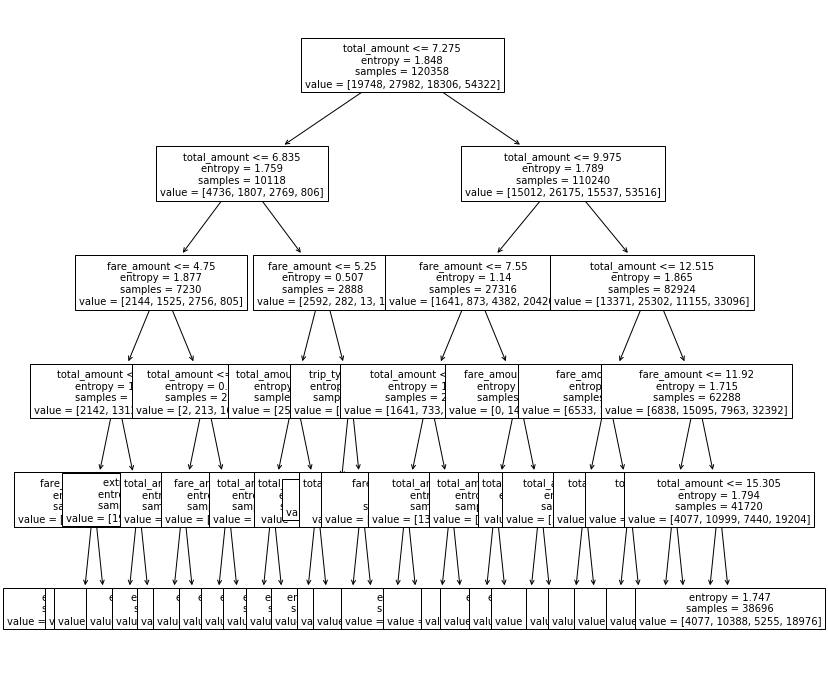

In [15]:
#TODO: Display the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
viz = tree.plot_tree(dt_classifier, feature_names = features, max_depth = 5, fontsize = 10)
viz

### Summarize the results using one paragraph (2-5 sentences)

I think overall I got what I expected to see with essentially how much the customer is being charged being the main driving force of the tip amount. Playing around with the various fields would most likely end with similar results. For example, the longer the trip is the more someone will be charged so if you remove total and fare amounts, distance will most likely be the determining factor. It would be interesting to take a look at tip% in comparison to tip amount and see if different combinations of attributes start to play a larger role. The accuracy could probably do with a little improving, at 66% it most likely isn't overfitted but could possibly still be underperforming.